# $k$-armed Bandit Problem

An agent chooses one of $k$ possible actions. Depending on the action chosen, the agent receives a reward given by a probability distribution specific to that option.

The agent makes successive selections, with the goal of maximizing the expected total payoff.

More importantly, the agent does not know the distributions of reward for each of the $k$ actions.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## A/B/n Testing

In [4]:
class GaussianBandit(object):
    def __init__(self, mean=0., stdev=1.):
        self.mean = mean
        self.stdev = stdev
    def pull_lever(self):
        reward = np.random.normal(self.mean, self.stdev)
        return np.round(reward, 1)

class GaussianBanditGame(object):
    def __init__(self, bandits):
        self.bandits = bandits
        np.random.shuffle(self.bandits)
        self.reset_game()

    def play(self, choice):
        reward = self.bandits[choice - 1].pull_lever()
        self.rewards.append(reward)
        self.total_reward += reward
        self.n_played += 1
        return reward

    def user_play(self):
        self.reset_game()
        print("Game started. Enter 0 as input to end the game.")
        while True:
            print(f"\n -- Round {self.n_played}")
            choice = int(input(f'Choose a machine from 1 to {len(self.bandits)}: '))
            if choice in range(1, len(self.bandits) + 1):
                reward = self.play(choice)
                print(f"Machine {choice} yields a reward of {reward}")
                avg_reward = self.total_reward / self.n_played
                print(f"Your average reward so far is {avg_reward}")
            else:
                break
        print("The game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward} after {self.n_played} round(s)")
            avg_reward = self.total_reward / self.n_played
            print(f"Average reward is {avg_reward}.")

    def reset_game(self):
        self.rewards = []
        self.total_reward = 0
        self.n_played = 0

In [5]:
slot_a = GaussianBandit(5, 3)
slot_b = GaussianBandit(6, 2)
slot_c = GaussianBandit(1, 5)
game = GaussianBanditGame([slot_a, slot_b, slot_c])

The next cell allows user to play the game. When tired of playing, enter 0 on the field.

In [6]:
game.user_play()

Game started. Enter 0 as input to end the game.

 -- Round 0
Choose a machine from 1 to 3: 0
The game has ended.


In [7]:
game.bandits[0].mean

6

In [8]:
class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
        self.rng = np.random.default_rng()
    
    def display_ad(self):
        reward = int(self.rng.random() < self.p)
        return reward

In [9]:
ad_A = BernoulliBandit(0.004)
ad_B = BernoulliBandit(0.016)
ad_C = BernoulliBandit(0.02)
ad_D = BernoulliBandit(0.028)
ad_E = BernoulliBandit(0.031)
ads = [ad_A, ad_B, ad_C, ad_D, ad_E]

In [10]:
n_test = 10000
n_prod = 90000
n_ads = len(ads)
Q = np.zeros(n_ads) # Average reward for each ad
N = np.zeros(n_ads) # Number of times an ad was used
total_reward = 0
avg_rewards = []
for i in range(n_test):
    ad_chosen = np.random.randint(n_ads)
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)
print(f'Rewards: {", ".join(str(v) for v in Q)}')
best_ad_index = np.argmax(Q)
print(f'The best performing ad is {best_ad_index}')

Rewards: 0.003080082135523621, 0.013486513486513467, 0.020750988142292506, 0.027679919476597866, 0.03482099068170678
The best performing ad is 4


In [11]:
ad_chosen = best_ad_index
for i in range(n_prod):
    R = ads[ad_chosen].display_ad()
    total_reward += R
    avg_reward_so_far = total_reward / (n_test + i + 1)
    avg_rewards.append(avg_reward_so_far)

In [12]:
df_reward_comparison = pd.DataFrame(data=avg_rewards, columns=['A/B/n'])
df_reward_comparison

,A/B/n
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
99995,0.029611
99996,0.029611
99997,0.029621
99998,0.029620


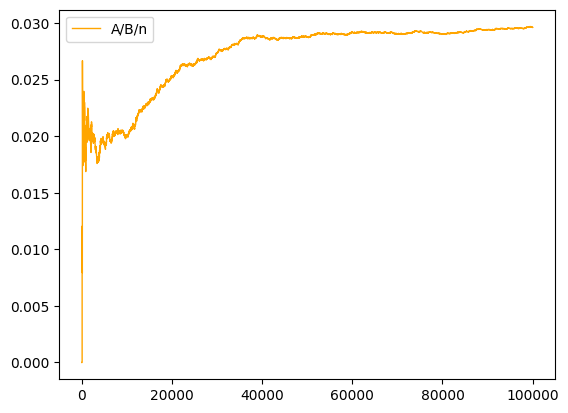

In [17]:
df_reward_comparison.plot(lw=1, color='orange')
None

## $\epsilon$ Greedy Actions

In [18]:
n_prod = 100000
n_ads = len(ads)
ad_chosen = np.random.randint(n_ads)
eps_values = [0.2, 0.1, 0.01, 0.02]
greedy_list = []
for eps in eps_values:
    col_name = f'e-greedy: {eps}'
    greedy_list.append(col_name)
    Q = np.zeros(n_ads)
    N = np.zeros(n_ads)
    total_reward = 0
    avg_rewards = []
    for i in range(n_prod):
        R = ads[ad_chosen].display_ad()
        N[ad_chosen] += 1
        Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
        total_reward += R
        avg_reward_so_far = total_reward / (i + 1)
        avg_rewards.append(avg_reward_so_far)
        if np.random.uniform() <= eps:
            ad_chosen = np.random.randint(n_ads)
        else:
            ad_chosen = np.argmax(Q)
    df_reward_comparison[col_name] = avg_rewards

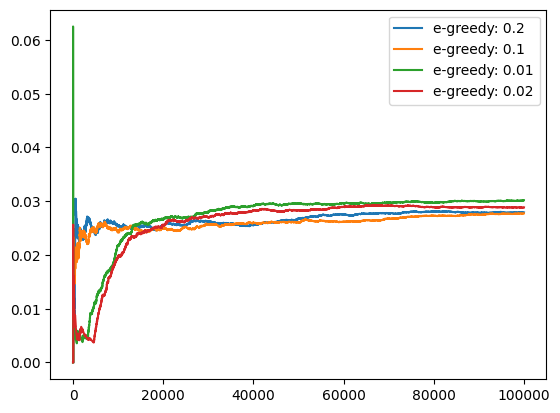

In [23]:
df_reward_comparison[greedy_list].plot()
None